### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import pandas as pd

# File to Load (Remember to Change These)
file_to_load = "Resources/purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)
#purchase_data.head()

## Player Count

* Display the total number of players


In [2]:
# Display the total number of players
Total_Players = len(purchase_data["SN"].unique())
Total_Players_df = pd.DataFrame({
                                    "Total Players":[Total_Players]
})
print(Total_Players_df)
Total_Players_df


,Total Players
0,576


## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [3]:
# Calculate the number of unique IDs in the DataFrame
Unique_Items = len(purchase_data["Item ID"].unique())

# Calculate the average price in the DataFrame
Avg_Price = purchase_data["Price"].mean()

# Calculate the number of purchase in the DataFrame
Number_Purchase = len(purchase_data)

# Calculate the total revenue in the DataFrame
Total_Revenue = purchase_data["Price"].sum()


# Creating a summary data frame
summary_df = pd.DataFrame({
                            "Number of Unique Items" :[Unique_Items],
                            "Average Price" :[Avg_Price],
                            "Number of Purchases":[Number_Purchase],
                            "Total Revenue" :[Total_Revenue]
})

# Formatting the columns
summary_df["Average Price"] = summary_df["Average Price"].map("${:.2f}".format)
summary_df["Total Revenue"] = summary_df["Total Revenue"].map("${:,.2f}".format)

#Display the summary data frame
print(summary_df)
summary_df

,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
0,179,$3.05,780,"$2,379.77"


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [4]:
#Total_Players = len(purchase_data["SN"].unique())

#Creating dataframe and only counting unique player IDs from column "SN" to calcuate the total players by their gender
df = purchase_data.drop_duplicates(subset=["SN"])

#Counting total number of players by gender
gender_df = df["Gender"].value_counts()

#Converting value counts into dataframe
new_df = pd.DataFrame(gender_df)

#Renaming the columns
new_df = new_df.rename(columns={"Gender":"Total Count"})

#Calcuating the percentage of players by gender and formatting
new_df["Percentage of Players"] = new_df["Total Count"]/Total_Players*100
new_df["Percentage of Players"] = new_df["Percentage of Players"].map("{:.2f}%".format)

print(new_df)
new_df



,Total Count,Percentage of Players
Male,484,84.03%
Female,81,14.06%
Other / Non-Disclosed,11,1.91%



## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [5]:
#grouping by gender to calculate the purchase count, avg. purchase price, avg. purchase total per person
grouped_gender_df = purchase_data.groupby(["Gender"])

purchase_count = grouped_gender_df["Gender"].count()
avg_price = grouped_gender_df["Price"].mean()
total_purchase_value = grouped_gender_df["Price"].sum()
avg_total_purchase = total_purchase_value/gender_df

#creating a dataframe to hold the results
purchasing_analysis_df = pd.DataFrame({
                                        "Purchase Count": purchase_count,
                                        "Average Purchase Price":avg_price,
                                        "Total Purchase Value":total_purchase_value,
                                        "Avg Total Purchase per Person":avg_total_purchase
                                        })

#Optional: give the displayed data cleaner formatting
purchasing_analysis_df["Average Purchase Price"] =purchasing_analysis_df["Average Purchase Price"].map("${:.2f}".format)
purchasing_analysis_df["Total Purchase Value"] =purchasing_analysis_df["Total Purchase Value"].map("${:,.2f}".format)
purchasing_analysis_df["Avg Total Purchase per Person"] =purchasing_analysis_df["Avg Total Purchase per Person"].map("${:.2f}".format)

#Display the summary data frame
print(purchasing_analysis_df)
purchasing_analysis_df

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Female,113,$3.20,$361.94,$4.47
Male,652,$3.02,"$1,967.64",$4.07
Other / Non-Disclosed,15,$3.35,$50.19,$4.56


## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


## Purchasing Analysis (Age)

In [6]:
#Establish bins for ages
bins = [0,9,14,19,24,29,34,39,150]

#Categorize the existing players using the age bins. Hint: use pd.cut()
group_labels = ["<10","10-14","15-19","20-24","25-29","30-34","35-39","40+"]
purchase_data["Age Ranges"] = pd.cut(purchase_data["Age"], bins, labels=group_labels)

#removal of duplicates by Purchase ID
age_df = purchase_data.drop_duplicates(subset=["SN"])

# Groupby "Age Ranges" to calculate total players by age
age_range = age_df.groupby("Age Ranges")
new_age_range = age_range["Purchase ID"].count()

# renaming columns
new_age_df = pd.DataFrame(new_age_range)
new_age_df = new_age_df.rename(columns={"Purchase ID":"Total Count"})

#Calcuating the percentage of players by gender and formatting
new_age_df["Percentage of Players"] = new_age_df["Total Count"]/Total_Players*100

# Optional: round the percentage column to two decimal points
new_age_df["Percentage of Players"] = new_age_df["Percentage of Players"].map("{:.2f}%".format)

# reseting inde
new_age_df = new_age_df.reset_index()
new_age_df = new_age_df.set_index("Age Ranges")

# Display Age Demographics Table
print(new_age_df)
new_age_df

,Total Count,Percentage of Players
Age Ranges,,
<10,17,2.95%
10-14,22,3.82%
15-19,107,18.58%
20-24,258,44.79%
25-29,77,13.37%
30-34,52,9.03%
35-39,31,5.38%
40+,12,2.08%


* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [7]:
#Establish bins for ages
#Same as the above exercise
bins = [0,9,14,19,24,29,34,39,150]

#Categorize the existing players using the age bins. Hint: use pd.cut()
group_labels = ["<10","10-14","15-19","20-24","25-29","30-34","35-39","40+"]
purchase_data["Age Ranges"] = pd.cut(purchase_data["Age"], bins, labels=group_labels)

# Creating a dataframe grouped by "Age Ranges"
grouped_age_df = purchase_data.groupby(["Age Ranges"])

# Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below
purchase_count = grouped_age_df["Age Ranges"].count()
avg_price = grouped_age_df["Price"].mean()
total_purchase_value = grouped_age_df["Price"].sum()
avg_total_purchase = total_purchase_value/new_age_range

# Creating a dataframe to hold the results
purchasing_analysis_age_df = pd.DataFrame({
                                        "Purchase Count": purchase_count,
                                        "Average Purchase Price":avg_price,
                                        "Total Purchase Value":total_purchase_value,
                                        "Avg Total Purchase per Person":avg_total_purchase
                                        })

# Optional: give the displayed data cleaner formatting
purchasing_analysis_age_df["Average Purchase Price"] =purchasing_analysis_age_df["Average Purchase Price"].map("${:.2f}".format)
purchasing_analysis_age_df["Total Purchase Value"] =purchasing_analysis_age_df["Total Purchase Value"].map("${:,.2f}".format)
purchasing_analysis_age_df["Avg Total Purchase per Person"] =purchasing_analysis_age_df["Avg Total Purchase per Person"].map("${:.2f}".format)


# Display the summary data frame
print(purchasing_analysis_age_df)
purchasing_analysis_age_df


,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Age Ranges,,,,
<10,23,$3.35,$77.13,$4.54
10-14,28,$2.96,$82.78,$3.76
15-19,136,$3.04,$412.89,$3.86
20-24,365,$3.05,"$1,114.06",$4.32
25-29,101,$2.90,$293.00,$3.81
30-34,73,$2.93,$214.00,$4.12
35-39,41,$3.60,$147.67,$4.76
40+,13,$2.94,$38.24,$3.19


## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [8]:
grouped_ID_df = purchase_data.groupby(["SN"])


# Run basic calculations to obtain the results

purchase_count = grouped_ID_df["Age Ranges"].count()
avg_price = grouped_ID_df["Price"].mean()
total_purchase_value = grouped_ID_df["Price"].sum()

# Creating DataFrame to hold the results
purchasing_analysis_ID_df = pd.DataFrame({
                                        "Purchase Count": purchase_count,
                                        "Average Purchase Price":avg_price,
                                        "Total Purchase Value":total_purchase_value,
                                        })

# Sorting by total purchase value to identify top spenders
sort_ID_df = purchasing_analysis_ID_df.sort_values("Total Purchase Value",ascending=False)

# Optional: give the displayed data cleaner formatting
sort_ID_df["Average Purchase Price"] =sort_ID_df["Average Purchase Price"].map("${:.2f}".format)
sort_ID_df["Total Purchase Value"] =sort_ID_df["Total Purchase Value"].map("${:,.2f}".format)

#reset index
reset_sort_ID_df = sort_ID_df.reset_index()



# filter by top 5 spenders using loc 
top_spenders_df = reset_sort_ID_df.loc[0:4]

# could also filter by using top_spenders_df.head(5)
# Display a preview of the summary data frame
print(top_spenders_df)
top_spenders_df.head(5)

,SN,Purchase Count,Average Purchase Price,Total Purchase Value
0,Lisosia93,5,$3.79,$18.96
1,Idastidru52,4,$3.86,$15.45
2,Chamjask73,3,$4.61,$13.83
3,Iral74,4,$3.41,$13.62
4,Iskadarya95,3,$4.37,$13.10




## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, average item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [9]:
grouped_item_df = purchase_data.groupby(["Item ID", "Item Name"])

# Run basic calculations to obtain the results
purchase_count = grouped_item_df["Purchase ID"].count()
avg_price = grouped_item_df["Price"].mean()
total_purchase_value = grouped_item_df["Price"].sum()


# Creating DataFrame to hold the results
purchasing_analysis_item_df = pd.DataFrame({
                                        "Purchase Count": purchase_count,
                                        "Average Purchase Price":avg_price,
                                        "Total Purchase Value":total_purchase_value,
                                        })


# Sorting by total purchase value to identify most popular items
sort_item_df = purchasing_analysis_item_df.sort_values("Purchase Count",ascending=False)


# Optional: give the displayed data cleaner formatting
sort_item_df["Average Purchase Price"] =sort_item_df["Average Purchase Price"].map("${:.2f}".format)
sort_item_df["Total Purchase Value"] =sort_item_df["Total Purchase Value"].map("${:,.2f}".format)

#reset index
reset_sort_item_df = sort_item_df.reset_index()



# filter by top 5 most popular items using loc 
top_item_df = reset_sort_item_df.loc[0:4]

# could also filter by using top_items_df.head(5)
# Display a preview of the summary data frame
print(top_item_df)
top_item_df.head(5)

,Item ID,Item Name,Purchase Count,Average Purchase Price,Total Purchase Value
0,92,Final Critic,13,$4.61,$59.99
1,178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
2,145,Fiery Glass Crusader,9,$4.58,$41.22
3,132,Persuasion,9,$3.22,$28.99
4,108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77


## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [10]:
grouped_items_df = purchase_data.groupby(["Item ID", "Item Name"])

# Run basic calculations to obtain the results
purchase_count = grouped_items_df["Purchase ID"].count()
avg_price = grouped_items_df["Price"].mean()
total_purchase_value = grouped_items_df["Price"].sum()


# Creating DataFrame to hold the results
purchasing_analysis_items_df = pd.DataFrame({
                                        "Purchase Count": purchase_count,
                                        "Average Purchase Price":avg_price,
                                        "Total Purchase Value":total_purchase_value,
                                        })


# Sorting by total purchase value to identify most popular items
sort_items_df = purchasing_analysis_items_df.sort_values("Total Purchase Value",ascending=False)


# Optional: give the displayed data cleaner formatting
sort_items_df["Average Purchase Price"] =sort_items_df["Average Purchase Price"].map("${:.2f}".format)
sort_items_df["Total Purchase Value"] =sort_items_df["Total Purchase Value"].map("${:,.2f}".format)

#reset index
reset_sort_items_df = sort_items_df.reset_index()



# filter by top 5 most popular items using loc 
top_items_df = reset_sort_items_df.loc[0:4]

# could also filter by using top_items_df.head(5)
# Display a preview of the summary data frame
print(top_items_df)
top_items_df.head(5)

,Item ID,Item Name,Purchase Count,Average Purchase Price,Total Purchase Value
0,92,Final Critic,13,$4.61,$59.99
1,178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
2,82,Nirvana,9,$4.90,$44.10
3,145,Fiery Glass Crusader,9,$4.58,$41.22
4,103,Singed Scalpel,8,$4.35,$34.80


## Written Description of observable trends

* Based on the data, male players is making up the majority of the overall player where they are making up 84.03% of overall population.
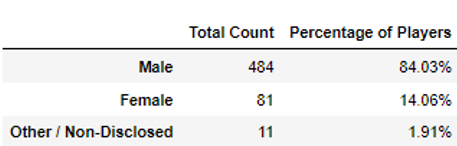

* While Male purchased more items (1.35 items = 652 items/484 person) per person than female (0.72 items = 113 items/81 person), Female group had spent slightly higher in average/overall purchase of the items compared to male group ($4.47 vs $4.07) showing that Female group spending more purchasing an item than male.
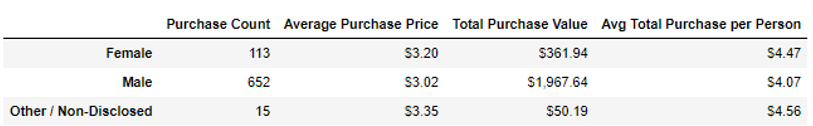


* Age group between 20-24 years old showed the highest percentage of players as well as highest purchase count. While age group between 35-39 is spending most per purchase/per person.
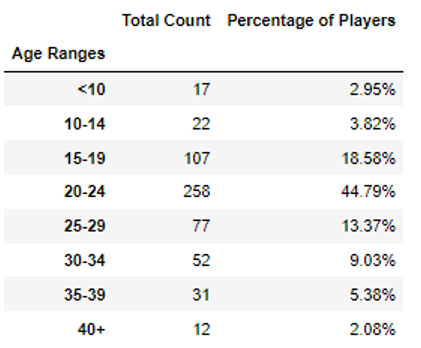
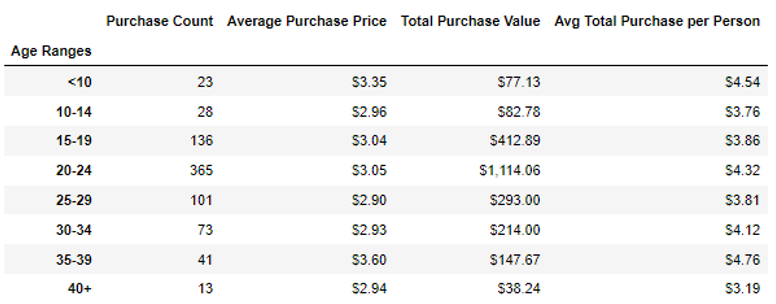

* Most profitable and popular item is "Final Critic" followed by "Oathbreaker, Last Hope of the Breaking Storm"
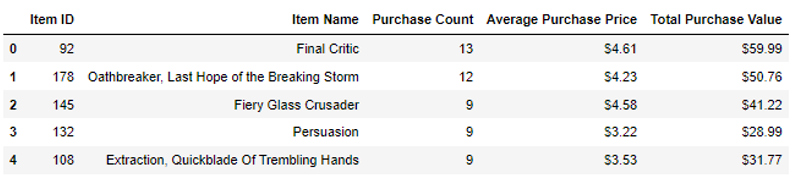
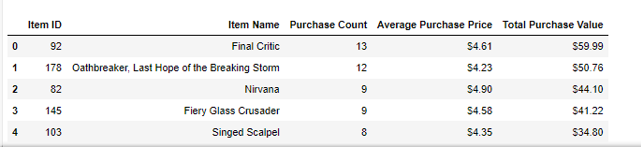